In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table


In [19]:
import matplotlib 
 
def set_rc_params(mult=1):
    matplotlib.rcParams.update({'font.size': 18*mult})
    matplotlib.rc('font',family='serif')
    matplotlib.rcParams['legend.fontsize'] = 15.5*mult
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['xtick.labelsize'] = 16*mult
    matplotlib.rcParams['ytick.labelsize'] = 16*mult
    matplotlib.rcParams['xtick.major.size'] = 10
    matplotlib.rcParams['ytick.major.size'] = 10
    matplotlib.rcParams['xtick.major.width'] = 2
    matplotlib.rcParams['ytick.major.width'] = 2
    matplotlib.rcParams['xtick.minor.size'] = 5
    matplotlib.rcParams['ytick.minor.size'] = 5
    matplotlib.rcParams['xtick.minor.width'] = 1
    matplotlib.rcParams['ytick.minor.width'] = 1
    matplotlib.rcParams['xtick.direction'] = 'in'
    matplotlib.rcParams['ytick.direction'] = 'in'
    matplotlib.rcParams['xtick.bottom'] = True
    matplotlib.rcParams['ytick.left'] = True
    matplotlib.rcParams["xtick.minor.visible"] = True
    matplotlib.rcParams["ytick.minor.visible"] = True
    matplotlib.rcParams['axes.labelsize'] = 20*mult
    matplotlib.rcParams['figure.figsize'] = (10,7)
set_rc_params(1)
 

In [20]:
"""
Plot dep(Fe) - log N(H) relation for METAL-Z targets
Include METAL targets
Plot the derived linear relation for METAL-Z (LMC slope, BH fitted)
"""

'\nPlot dep(Fe) - log N(H) relation for METAL-Z targets\nInclude METAL targets\nPlot the derived linear relation for METAL-Z (LMC slope, BH fitted)\n'

In [21]:
# colors for plots
Cic, Cwlm, Csex = 'k', 'm', 'r'
Cmw, Clmc, Csmc = 'darkorange', 'deepskyblue', 'forestgreen'

In [22]:
# depletions form METAL 

lmc = Table.read('../METAL_depletions_and_ci_results_with_env_fix1220.fits', format='fits')
smc = Table.read('../compiled_depletions_jenkins2017_py.fits', format='fits')
mw = Table.read('../compiled_depletions_jenkins2009_py_adj_zeropt_zn.fits', format='fits')

lmc_S, lmc_S_err, lmc_Fe, lmc_Fe_err = lmc['DEPLETIONS'][0:, 9],lmc['ERR_DEPLETIONS'][0:, 9], lmc['DEPLETIONS'][0:, 2], lmc['ERR_DEPLETIONS'][0:, 2]
smc_S, smc_S_err, smc_Fe, smc_Fe_err = smc['DEPLETIONS'][0:, 4],smc['ERR_DEPLETIONS'][0:, 4], smc['DEPLETIONS'][0:, 0], smc['ERR_DEPLETIONS'][0:, 0]
mw_S, mw_S_err, mw_Fe, mw_Fe_err = mw['DEPLETIONS'][0:, 14], mw['ERR_DEPLETIONS'][0:, 14], mw['DEPLETIONS'][0:, 5], mw['ERR_DEPLETIONS'][0:, 5]

lmc_NH, lmc_NH_err = lmc['LOG_NH'], lmc['ERR_LOG_NHI']
smc_NH, smc_NH_err = smc['LOG_NH'], smc['ERR_LOG_NHI']
mw_NH, mw_NH_err = mw['LOG_NH'], mw['ERR_LOG_NHI']

In [27]:
# METAL-Z data
metalz = Table.read('METALZ-results.fits')

# chose sections of the result table for different galxies
ic1613 = metalz[:10]
sexA = metalz[10:]

In [33]:
# LMC d(Fe) - log N(H) relation parameters 
Almc_Fe, Almc_Fe_e, zlmc_Fe = -0.71, 0.03, 21.288

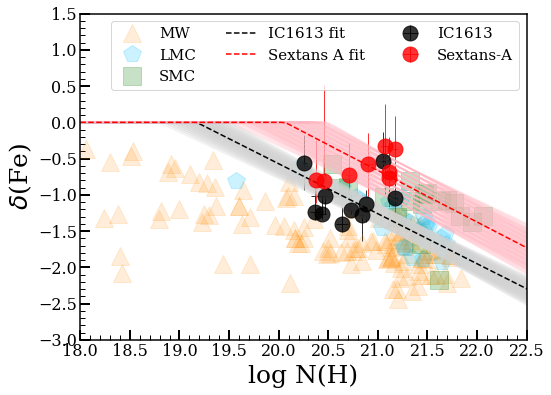

In [37]:
# plot dep(Fe) - logNH relations for METAL-Z

NH = np.linspace(18,23, 100)

fig = plt.figure(figsize=(8, 6))

plt.xlabel('log N(H)', fontsize=25)
plt.ylabel(r'$\delta$(Fe)', fontsize=25)
plt.xlim([18.,22.5])
plt.ylim([-3., 1.5])

# METAL 
plt.plot(mw_NH, mw_Fe, '^', label='MW', markersize=18, c=Cmw,alpha=0.15)
plt.plot(lmc_NH, lmc_Fe, 'p', label='LMC', markersize=18, c=Clmc,alpha=0.2)
plt.plot(smc_NH, smc_Fe, 's', label='SMC', markersize=18, c=Csmc,alpha=0.25)

# METAL-Z
plt.errorbar(ic1613['N(HI)'][:,0],ic1613['d(Fe)'][:,0], fmt='o', markeredgewidth=1,label='IC1613', markersize=15,markeredgecolor='k',markerfacecolor='k', 
               xerr=ic1613['N(HI)'][:,1], yerr=[ic1613['d(Fe)'][:,1],ic1613['d(Fe)'][:,2]], ecolor='k', elinewidth=1, alpha=0.8)
plt.errorbar(sexA['N(HI)'][:,0],sexA['d(Fe)'][:,0], fmt='o', markeredgewidth=1,label='Sextans-A', markersize=15,markeredgecolor='r',markerfacecolor='r', 
              xerr=sexA['N(HI)'][:,1], yerr=[sexA['d(Fe)'][:,1],sexA['d(Fe)'][:,2]], ecolor=Csex, elinewidth=1, alpha=0.8)

# Fe IC1613
# best, up, down

Fe_IC = np.array([-0.69, -1.46])
aa = np.linspace(-0.64, -0.76, 10)
bb = np.linspace(-1.34,-1.60, 10)   

# METAL-Z relations d(Fe) - log NH (fitted through bayes)

Y = (NH - zlmc_Fe) * Fe_IC[0] + Fe_IC[1]
# If d(X) > 0, change to 0 (non physical)

for i in range(10):
    for j in range(10):
        
        y = (NH - zlmc_Fe) * aa[i] + bb[j]
        plt.plot(NH,np.where(y < 0, y,0), '-', c='lightgrey', alpha=0.3)
plt.plot(NH, np.where(Y < 0, Y, 0), c='k', ls='--' ,label='IC1613 fit')

# Sextans A Fe

Fe_sa = np.array([-0.71, -0.87])
aa = np.linspace(-0.65, -0.77, 10)
bb = np.linspace(-0.61, -1.16, 10)  

Y = (NH - zlmc_Fe) * Fe_sa[0] + Fe_sa[1]

# If d(X) > 0, change to 0 (non physical)

for i in range(10):
    for j in range(10):
        
        y = (NH - zlmc_Fe) * aa[i] + bb[j]
        plt.plot(NH,np.where(y < 0, y,0), '-', c='lightpink', alpha=0.3)
plt.plot(NH, np.where(Y < 0, Y, 0), c='r', ls='--' ,label='Sextans A fit')


plt.legend(ncol=3, fontsize=15)

fig.savefig("dep-Fe-NH.png", facecolor='white',  bbox_inches='tight')
